In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [42]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [43]:
dir(datasets.cifar10)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [44]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [45]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [46]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [47]:
classes[9]

'truck'

In [48]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

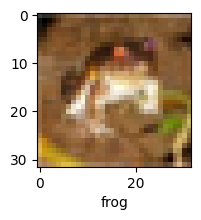

In [49]:
plot_sample(X_train, y_train, 0)

**Normalize the values**

In [50]:
X_train = X_train / 255
X_test = X_test / 255

In [51]:
y_train.shape, X_train.shape

((50000,), (50000, 32, 32, 3))

In [52]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3044 - loss: 1.9248
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4199 - loss: 1.6457
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4541 - loss: 1.5525
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4754 - loss: 1.4918
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4931 - loss: 1.4389


In [53]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4949 - loss: 1.4353


[1.4417027235031128, 0.4867999851703644]

In [54]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [55]:
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [69]:
cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6425 - loss: 1.0142
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6583 - loss: 0.9774
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6665 - loss: 0.9536
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6755 - loss: 0.9284
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.8901
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6958 - loss: 0.8812
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7045 - loss: 0.8527
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7141 - loss: 0.8309
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7181 - loss: 0.8070
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7259 - loss: 0.7937
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7305 - loss: 0.7752
Epoch 12/100
1563/1

In [71]:
y_test= y_test.reshape(-1,)
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6556 - loss: 3.4271


[3.35443115234375, 0.6581000089645386]

In [58]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.97867619e-02, 2.38425983e-03, 1.35380253e-01, 3.90855670e-01,
        3.10348924e-02, 1.91613927e-01, 1.67025432e-01, 3.15744150e-03,
        4.13744412e-02, 7.38697639e-03],
       [9.78016332e-02, 6.92918539e-01, 2.32816892e-04, 2.30170972e-05,
        1.51305008e-04, 3.27408748e-06, 8.93853939e-05, 8.73475528e-06,
        1.96327657e-01, 1.24435313e-02],
       [5.58028817e-02, 1.52179182e-01, 8.59388965e-04, 6.66951237e-04,
        6.53540250e-04, 8.66101545e-05, 1.22638870e-04, 1.19804798e-04,
        7.81979442e-01, 7.52947992e-03],
       [8.72055709e-01, 8.47135391e-03, 7.24604400e-03, 8.29078315e-04,
        3.05147376e-03, 7.69262770e-05, 3.31785210e-04, 1.90762046e-04,
        1.05308235e-01, 2.43859366e-03],
       [1.24998434e-04, 4.62674041e-04, 1.50861777e-02, 4.14060764e-02,
        4.48925197e-01, 1.48877418e-02, 4.78009880e-01, 6.19878992e-04,
        3.75887408e-04, 1.01568854e-04]], dtype=float32)

In [67]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[np.int64(3),
 np.int64(1),
 np.int64(8),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

In [68]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

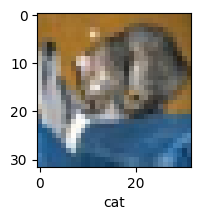

In [65]:
plot_sample(X_test, y_test, 0)

In [66]:
classes[y_classes[0]]

'cat'